# Bagging Machine Learning Algorithm

### **B**ootstrap **Agg**regat**ing** or [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
* [Scikit- Learn Reference](http://scikit-learn.org/stable/modules/ensemble.html#bagging)
* Bootstrap sampling: Sampling with replacement
* Combine by averaging the output (regression)
* Combine by voting (classification)
* Can be applied to many classifiers which includes ANN, CART, etc.



# The idea behind bagging is combining the results of multiple models (for instance, all decision trees) to get a generalized result. 

### Here’s a question: 

###  If you create all the models on the same set of data and combine it, will it be useful? 

### There is a high chance that these models will give the same result since they are getting the same input. So how can we solve this problem? One of the techniques is bootstrapping.

Bootstrapping is a sampling technique in which we create subsets of observations from the original dataset, with replacement. The size of the subsets is the same as the size of the original set.

Bagging (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.

<img src='img/bag.JPG'>

1. Multiple subsets are created from the original dataset, selecting observations with replacement.


2. A base model (weak model) is created on each of these subsets.


3. The models run in parallel and are independent of each other.


4. The final predictions are determined by combining the predictions from all the models


<img src='img/bag1.JPG'>


# Bagging algorithms:

#### 1. Bagging meta-estimator
#### 2. Random forest

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [6]:
df.dropna(inplace=True)

In [7]:
df['age'].fillna((df['age'].mean()),inplace=True)

In [8]:
df['pclass'].unique()

array([1, 3, 2])

In [9]:
df['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [10]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
df['sex'].value_counts()

male      94
female    88
Name: sex, dtype: int64

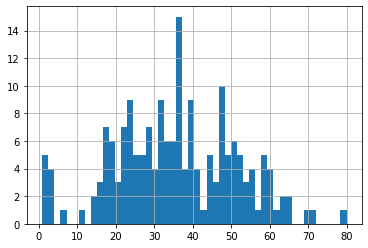

In [12]:
df['age'].hist(bins=50);

## Data Pre-processing

In [13]:
X = df[['pclass', 'sex', 'age']]

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
pclass    182 non-null int64
sex       182 non-null object
age       182 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.7+ KB


In [15]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
pclass    182 non-null int64
sex       182 non-null object
age       182 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.7+ KB


In [17]:
X['sex'] = lb.fit_transform(X['sex'])

/Users/vipulgaur/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [19]:
X.shape

(182, 3)

In [20]:
X.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
pclass    182 non-null int64
sex       182 non-null int64
age       182 non-null float64
dtypes: float64(1), int64(2)
memory usage: 5.7 KB


In [22]:
y = df['survived']

In [23]:
y.value_counts()

1    123
0     59
Name: survived, dtype: int64

# Fit Model

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [28]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

## Decision Tree

In [31]:
clf = DecisionTreeClassifier(random_state=42)

In [32]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [33]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9387

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        50
           1       0.96      0.95      0.96       113

    accuracy                           0.94       163
   macro avg       0.92      0.93      0.93       163
weighted avg       0.94      0.94      0.94       163


Confusion Matrix: 
 [[ 46   4]
 [  6 107]]

Average Accuracy: 	 0.7680
Accuracy SD: 		 0.1219


In [34]:
print_score(clf, X_train, y_train, X_test, y_test, train=False) # Test

Test Result:

accuracy score: 0.8421

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.89      0.80      0.84        10

    accuracy                           0.84        19
   macro avg       0.84      0.84      0.84        19
weighted avg       0.85      0.84      0.84        19


Confusion Matrix: 
 [[8 1]
 [2 8]]



# Exercise:

# Run the same sheet with following modifications:

# 1. Move df.dropna(inplace=True) to Code
# 2. Try with decreased(10%) test set


***